## 전기차 Electric Vehicle 관련 EDA 진행

#### 1. 21년도 기준 서울과 서울 이외 지역 전기차 판매량 비교
#### 2. 21년도 기준 전세계 전기차 충전소 개수/판매량 을 국가별로 비교
#### 3. 연도별 전기차 판매량을 국가별로 비교 
#### 4. 21년도 기준 전세계 전기차 판매량을 국가별로 비교
#### 5. 21년도 기준 전기차 판매비율 ( 전기차/전체차)을 국가별로 비교


In [1]:
import pandas as pd
import numpy as np

In [2]:
# Matplotlib 임포트
import matplotlib.pyplot as plt

# Matplotlib 한글 폰트 설정
from matplotlib import font_manager as fm, rc

# 한글 폰트 설정
font_path = '../Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

In [3]:
PATH = '../DATA_NAMGWANG/'
FILENAME = PATH + 'IEA-EV-data.csv'
evDF = pd.read_csv(FILENAME)
evDF

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,sales,49.000000
1,Australia,Historical,EV stock,Cars,BEV,2011,stock,49.000000
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.006479
3,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.000464
4,Australia,Historical,EV stock share,Cars,EV,2012,percent,0.002785
...,...,...,...,...,...,...,...,...
7011,World,Projection-STEPS,Oil displacement Mbd,Cars,EV,2030,Milion barrels per day,2.409347
7012,World,Projection-STEPS,Oil displacement Mlge,Buses,EV,2030,Milion litres gasoline equivalent,30311.880859
7013,World,Projection-STEPS,Oil displacement Mlge,Trucks,EV,2030,Milion litres gasoline equivalent,13943.429688
7014,World,Projection-STEPS,Oil displacement Mlge,Vans,EV,2030,Milion litres gasoline equivalent,16207.837891


In [4]:
# 서울시 행정동별 친환경자동차_현황_2021 파일을 받아서 21년도 기준 서울시에 신규 등록된 전기차의 개수를 추출
FILENAME_SEOUL = PATH + '서울시 행정동별 친환경자동차 현황_2021.csv'
seoulDF = pd.read_csv(FILENAME_SEOUL, encoding='EUC-KR')
seoulDF

,기준년월,사용본거지시읍면동_행정동기준,차명,연료,최초등록일,현소유자의출생년도
0,2021-12,서울특별시 강남구 대치1동,토요타 Prius 2WD,하이브리드(휘발유+전기),2020-03-23,1979.0
1,2021-12,서울특별시 강남구 대치1동,아이오닉 하이브리드(IONIQ HY,하이브리드(휘발유+전기),2017-09-08,1979.0
2,2021-12,서울특별시 강남구 대치1동,Mercedes-Benz S500 4MATIC,하이브리드(휘발유+전기),2021-08-18,NaN
3,2021-12,서울특별시 강남구 대치1동,그랜저 하이브리드(GRANDEUR H,하이브리드(휘발유+전기),2021-04-22,1971.0
4,2021-12,서울특별시 강남구 대치1동,Model S 75D,전기,2018-09-20,1979.0
...,...,...,...,...,...,...
184893,2021-12,서울특별시 성동구 성수2가3동,A8 L 60 TFSI quattro,하이브리드(휘발유+전기),2021-04-13,NaN
184894,2021-12,서울특별시 성동구 성수2가3동,그랜저 하이브리드,하이브리드(휘발유+전기),2019-11-05,1965.0
184895,2021-12,서울특별시 성동구 성수2가3동,그랜저 하이브리드 (GRANDEUR,하이브리드(휘발유+전기),2016-04-05,1971.0
184896,2021-12,서울특별시 성동구 성수2가3동,니로 하이브리드,하이브리드(휘발유+전기),2017-06-23,NaN


In [5]:
# seoulDF의 정보를 알아보자.
seoulDF.info()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184898 entries, 0 to 184897
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   기준년월             184898 non-null  object 
 1   사용본거지시읍면동_행정동기준  184887 non-null  object 
 2   차명               184898 non-null  object 
 3   연료               184898 non-null  object 
 4   최초등록일            184898 non-null  object 
 5   현소유자의출생년도        141232 non-null  float64
dtypes: float64(1), object(5)
memory usage: 8.5+ MB


In [6]:
# seoulDF의 컬럼을 확인하자.
seoulDF.columns

Index(['기준년월', '사용본거지시읍면동_행정동기준', '차명', '연료', '최초등록일', '현소유자의출생년도'], dtype='object')

In [7]:
# 최초등록일에서 연도만 필요해서 
temp = [] # '최초등록일' -> 연도만 빼서 int로 저장
for i in seoulDF.index:
    temp.append(int(seoulDF['최초등록일'].loc[i][:4]))
seoulDF['최초등록일'] = temp
seoulDF

,기준년월,사용본거지시읍면동_행정동기준,차명,연료,최초등록일,현소유자의출생년도
0,2021-12,서울특별시 강남구 대치1동,토요타 Prius 2WD,하이브리드(휘발유+전기),2020,1979.0
1,2021-12,서울특별시 강남구 대치1동,아이오닉 하이브리드(IONIQ HY,하이브리드(휘발유+전기),2017,1979.0
2,2021-12,서울특별시 강남구 대치1동,Mercedes-Benz S500 4MATIC,하이브리드(휘발유+전기),2021,NaN
3,2021-12,서울특별시 강남구 대치1동,그랜저 하이브리드(GRANDEUR H,하이브리드(휘발유+전기),2021,1971.0
4,2021-12,서울특별시 강남구 대치1동,Model S 75D,전기,2018,1979.0
...,...,...,...,...,...,...
184893,2021-12,서울특별시 성동구 성수2가3동,A8 L 60 TFSI quattro,하이브리드(휘발유+전기),2021,NaN
184894,2021-12,서울특별시 성동구 성수2가3동,그랜저 하이브리드,하이브리드(휘발유+전기),2019,1965.0
184895,2021-12,서울특별시 성동구 성수2가3동,그랜저 하이브리드 (GRANDEUR,하이브리드(휘발유+전기),2016,1971.0
184896,2021-12,서울특별시 성동구 성수2가3동,니로 하이브리드,하이브리드(휘발유+전기),2017,NaN


In [8]:
seoulDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184898 entries, 0 to 184897
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   기준년월             184898 non-null  object 
 1   사용본거지시읍면동_행정동기준  184887 non-null  object 
 2   차명               184898 non-null  object 
 3   연료               184898 non-null  object 
 4   최초등록일            184898 non-null  int64  
 5   현소유자의출생년도        141232 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 8.5+ MB


In [9]:
# 서울의 연도별 신규 전기차 등록대수(21년도) 추출
seoul2021 = seoulDF[seoulDF['최초등록일'] ==2021].count()[0]  # seoul2021에 저장
seoul2021

50983

In [10]:
# 전세계 전기차 데이터의 정보를 알아본다.
evDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7016 entries, 0 to 7015
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      7016 non-null   object 
 1   category    7016 non-null   object 
 2   parameter   7016 non-null   object 
 3   mode        7016 non-null   object 
 4   powertrain  7016 non-null   object 
 5   year        7016 non-null   int64  
 6   unit        7016 non-null   object 
 7   value       7016 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 438.6+ KB


In [11]:
# evDF의 컬럼이 무엇으로 구성되어 있는지 확인
evDF.columns

Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')

In [12]:
# unique 메서드를 사용해서 각 컬럼 마다 무슨 값이 들어있는지 확인
someUnique = [evDF[col].unique() for col in evDF.columns]
someUnique

[array(['Australia', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China',
        'Denmark', 'Europe', 'Finland', 'France', 'Germany', 'Greece',
        'Iceland', 'India', 'Indonesia', 'Italy', 'Japan', 'Korea',
        'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Other Europe',
        'Poland', 'Portugal', 'Rest of the world', 'South Africa', 'Spain',
        'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'USA',
        'World'], dtype=object),
 array(['Historical', 'Projection-APS', 'Projection-STEPS'], dtype=object),
 array(['EV sales', 'EV stock', 'EV sales share', 'EV stock share',
        'EV charging points', 'Oil displacement Mbd',
        'Oil displacement Mlge', 'Electricity demand'], dtype=object),
 array(['Cars', 'EV', 'Trucks', 'Vans', 'Buses'], dtype=object),
 array(['BEV', 'EV', 'PHEV', 'Publicly available fast',
        'Publicly available slow'], dtype=object),
 array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
        2010, 2025, 203

In [13]:
someUnique[5]

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2010, 2025, 2030], dtype=int64)

In [14]:
# 과거의 자료만 필요하니까 category = Historical 만 추출.
hevDF = evDF[evDF['category'] == 'Historical'].copy()
# region에서 나라를 선택
choose = [someUnique[0][i] for i in [0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29,30,31,32]]

hev_cond = hevDF['region'].isin(choose)
hevDF2 = hevDF[hev_cond]
hevDF2     

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,sales,49.000000
1,Australia,Historical,EV stock,Cars,BEV,2011,stock,49.000000
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.006479
3,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.000464
4,Australia,Historical,EV stock share,Cars,EV,2012,percent,0.002785
...,...,...,...,...,...,...,...,...
6491,USA,Historical,Oil displacement Mlge,Cars,EV,2021,Milion litres gasoline equivalent,3372.190918
6494,USA,Historical,EV stock,Cars,PHEV,2021,stock,721103.000000
6495,USA,Historical,EV stock share,Cars,EV,2021,percent,0.898901
6496,USA,Historical,Electricity demand,Cars,BEV,2021,GWh,6479.013672


In [15]:
# x축으로 쓸 연도를 뽑는다.
hevUnique = someUnique[5][:-2]
hevUnique.sort()
hevUnique

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021], dtype=int64)

In [16]:
hevDFsales = hevDF2[hevDF2['parameter'] == 'EV sales']
hevDFshare = hevDF2[hevDF2['parameter'] == 'EV stock share']
# 지역, 연도 별로 판매량을 region_year_sum이라는 multiindex Series에 담고,
# 전기차 비중은 region_year_share에 담습니다. 
region_year_sum = hevDFsales.groupby(['region', 'year'])['value'].sum()
region_year_share = hevDFshare.groupby(['region', 'year'])['value'].sum()
print(f'전기차 판매량 합: \n {region_year_sum}', f'\n전기차 판매 비중: \n{region_year_share}')

전기차 판매량 합: 
 region          year
Australia       2011        49.000000
                2012       253.000000
                2013       293.000000
                2014      1322.000000
                2015      1771.000000
                            ...      
United Kingdom  2017     48575.599609
                2018     51819.060547
                2019     78197.000000
                2020    181143.000000
                2021    326990.000000
Name: value, Length: 322, dtype: float64 
전기차 판매 비중: 
region          year
Australia       2011    0.000464
                2012    0.002785
                2013    0.005384
                2014    0.017083
                2015    0.032180
                          ...   
United Kingdom  2017    0.983908
                2018    1.305138
                2019    1.764229
                2020    2.645560
                2021    4.342503
Name: value, Length: 316, dtype: float64


In [17]:
# 데이터 없는 연도 0으로 예외 처리하는 함수 생성
def data0(yearlist, multiindex_series):
    for region in someUnique[0]:
        for year in hevUnique:
            try: multiindex_series[region,year]
            except Exception: 
                multiindex_series[region,year] = 0

data0(hevUnique, region_year_sum)
data0(hevUnique, region_year_share)

In [18]:
# 2021년도 판매량이 높은 대표적인 국가 11개를 선발하고, 나머지는 etc로 묶자.
sort_sum = region_year_sum[:,2021].sort_values(ascending=False)
# 중국, 독일, 미국, 영국, 프랑스, 노르웨이, 이탈리아, 스웨덴, 한국, 네덜란드, 캐나다, 기타
chosen_country = list(sort_sum.head(9).index)
for region in someUnique[0]:
    if region not in list(chosen_country):
        for year in hevUnique:
            temp_sum = region_year_sum[region,year]
            temp_share = region_year_share[region,year]
            try: region_year_sum[('etc', year)] += temp_sum
            except Exception: region_year_sum[('etc', year)] = temp_sum
            try: region_year_share[('etc', year)] += temp_share
            except Exception: region_year_share[('etc', year)] = temp_share

chosen_country.reverse()
chosen_country.append('etc')
chosen_country

['Korea',
 'Sweden',
 'Italy',
 'Norway',
 'France',
 'United Kingdom',
 'USA',
 'Germany',
 'China',
 'etc']

In [19]:
# chosen_country에 해당하는 부분 region_year_sum 데이터프레임에서 고르기
chosen_year_sum = region_year_sum[chosen_country]
chosen_year_share = region_year_share[chosen_country]
# 2021년의 chosen_country에 대응되는 부분 chosen_year_share에서 값 추출
share_value2021 = [chosen_year_share[col, 2021] for col in chosen_country][:-1]

In [20]:
korea2021 = chosen_year_sum['Korea', 2021]
korea2021

119402.0

In [21]:
# 2021년도 충전소 개수(누적)
chargeDF = evDF[(evDF['unit'] == 'charging points') & (evDF['category'] == 'Historical') & (evDF['region'].isin(chosen_country)) & (evDF['year'] == 2021) ]
chosen_charge = chargeDF.groupby('region')['value'].sum()
print(chosen_charge, chosen_year_sum[:,2021] )

region
China             1147000.0
France              54260.0
Germany             50972.0
Italy               22471.0
Korea              106701.0
Norway              19278.0
Sweden              14094.0
USA                113527.0
United Kingdom      36894.0
Name: value, dtype: float64 region
Korea             1.194020e+05
Sweden            1.387710e+05
Italy             1.416150e+05
Norway            1.536990e+05
France            3.220430e+05
United Kingdom    3.269900e+05
USA               6.311520e+05
Germany           6.956570e+05
China             3.519054e+06
etc               6.509170e+05
Name: value, dtype: float64


In [22]:
chosen_sum = chosen_year_sum.groupby('region').sum()
print(chosen_sum)

region
China             9.003350e+06
France            7.942572e+05
Germany           1.425658e+06
Italy             2.470780e+05
Korea             2.985530e+05
Norway            5.965190e+05
Sweden            3.599490e+05
USA               2.373985e+06
United Kingdom    7.812717e+05
etc               2.053867e+06
Name: value, dtype: float64


In [23]:
# 충전소 개수 / 전기차 대수 계산한 값 -> 한 전기차 당 몇개의 충전소가 있는지 확인 가능
chosen_charge_per = 100 *chosen_charge / chosen_sum
charge_per_decend = chosen_charge_per.sort_values(ascending=False) 
print(charge_per_decend)

region
Korea             35.739383
China             12.739703
Italy              9.094699
France             6.831541
USA                4.782128
United Kingdom     4.722301
Sweden             3.915555
Germany            3.575332
Norway             3.231750
etc                     NaN
Name: value, dtype: float64


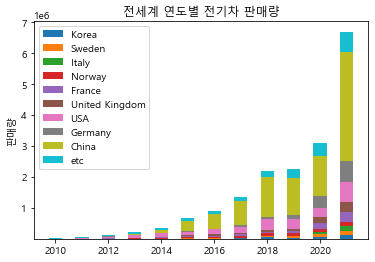

In [24]:
def world_sales(labels, countrylist, sumDF): 
    labels = hevUnique
    fig, ax = plt.subplots()
    somevalue =np.zeros(12)
    width = 0.5
    for region in countrylist:
        temp = sumDF[region]
        temp.sort_index(inplace=True)
        ax.bar(labels, temp, width, bottom = somevalue, label=f'{region}')
        somevalue += temp
    ax.set_ylabel('판매량')
    ax.set_title('전세계 연도별 전기차 판매량')
    ax.legend()
    plt.show()
    
world_sales(hevUnique,chosen_country, chosen_year_sum)

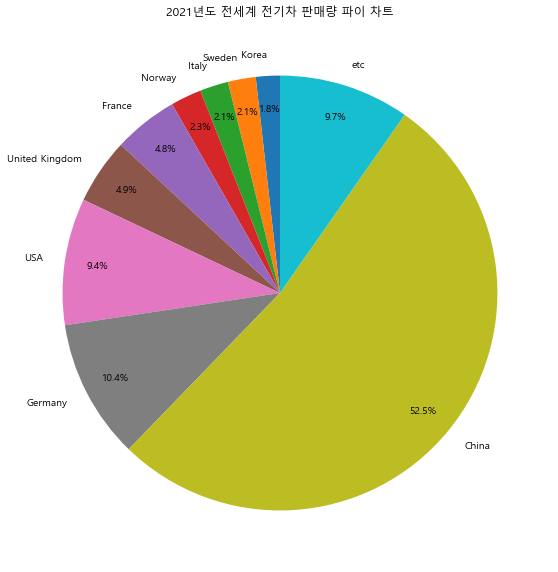

In [31]:
# 2021년 전세계 전기차 판매량 파이 차트
def makepie(label, size):
    plt.rcParams["figure.figsize"]=(22,10)
    plt.pie(size,labels = label, autopct='%.1f%%',  startangle=90, pctdistance = 0.85)
    plt.title('2021년도 전세계 전기차 판매량 파이 차트')
    plt.show()
makepie(chosen_country, chosen_year_sum[:, 2021])

In [26]:
# someSeries = pd.Series(chosen_year_share[:, 2021][:-1], chosen_country[:-1])
# someSeries = someSeries.sort_values(ascending = False)
# someSeries

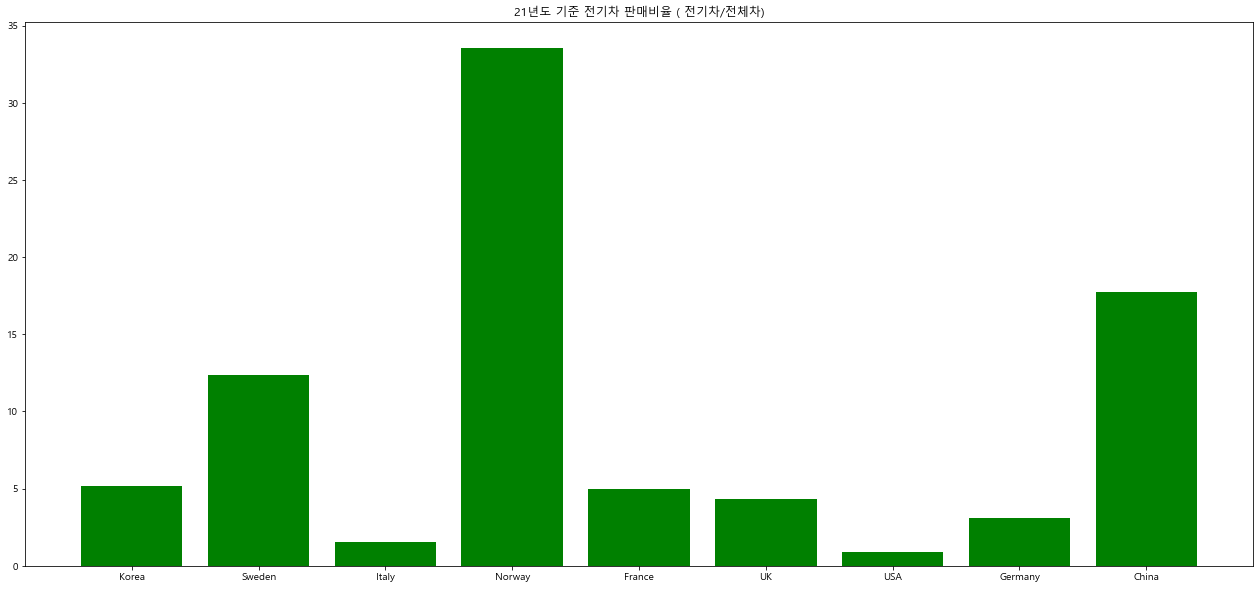

In [30]:
def makebar(label, size):
    label[5] ='UK'
    plt.bar(label, size, color = 'g')
    plt.title('21년도 기준 전기차 판매비율 ( 전기차/전체차)')
    plt.show()
makebar(chosen_country[:-1],chosen_year_share[:, 2021][:-1])

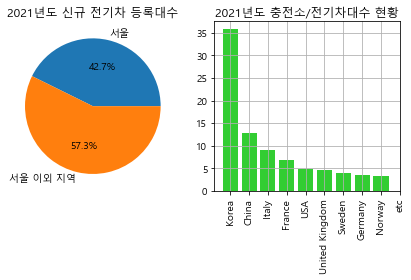

In [28]:
# 기능 실행

# 여러개의 플롯을 그리는 법
fig= plt.figure()

# 1. 21년도 기준 서울과 서울 이외 지역 전기차 판매량 비교
ax1 = fig.add_subplot(121)
ax1.set_title('2021년도 신규 전기차 등록대수')
ax1.pie([seoul2021,korea2021-seoul2021], labels=['서울', '서울 이외 지역'],autopct='%.1f%%')



# 2. 21년도 기준 전세계 전기차 충전소 개수/판매량 을 국가별로 비교
ax2 = fig.add_subplot(122)
labels2 = charge_per_decend.index
sizes2 = charge_per_decend
ax2.bar(labels2, sizes2, color = 'limegreen')
ax2.set_title('2021년도 충전소/전기차대수 현황')
ax2.set_xticks(labels2)
ax2.set_xticklabels(labels2, rotation=90)
ax2.grid(True)


# 여러개 plot 간격 자동 조절
fig.tight_layout()

# 화면 출력
plt.show()



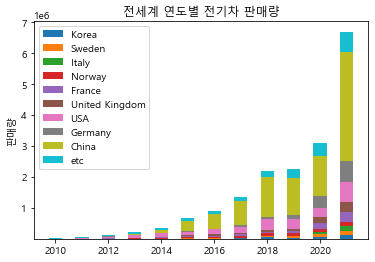

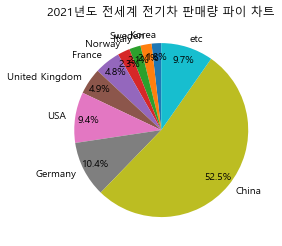

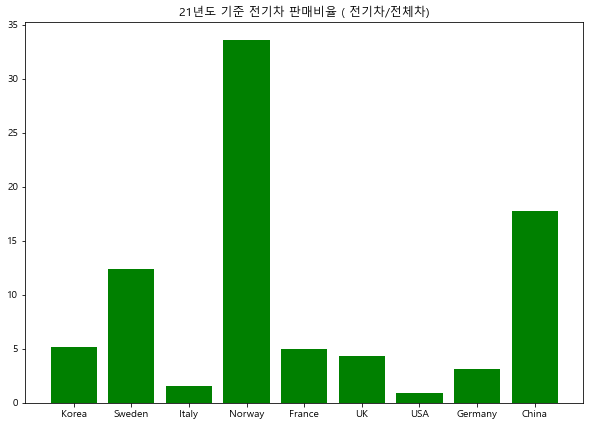

In [29]:
# 3. 연도별 전기차 판매량을 국가별로 비교 
world_sales(hevUnique,chosen_country, chosen_year_sum)
# 4. 21년도 기준 전세계 전기차 판매량을 국가별로 비교
makepie(chosen_country, chosen_year_sum[:, 2021])
# 5. 21년도 기준 전기차 판매비율 ( 전기차/전체차)을 국가별로 비교
makebar(chosen_country[:-1],chosen_year_share[:, 2021][:-1])